<h1>Lab 3: Spatial Filters and Two Slit Experiment</h1>

**Scott Prahl**

**April 2018**

In [1]:
# Execute these lines before starting the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special.orthogonal import hermite

def beam_waist_diameter(lambda0, dbeam, f):
    """
    Find the minimum possible diameter for a focused laser beam
    Args:
        lambda0: wavelength in a vacuum             [meters]
        dbeam:   diameter of beam entering the lens [meters]
        f:       focal length of a lens             [meters]
    Returns
        the minimum beam diameter [meters]
    """
    return 4.0*lambda0/np.pi * f/dbeam;

def obj_focal_length(power):
    """
    Find the focal length of a microscope objective
    Args:
        power: objective magnification      [-]
    Returns
        focal length of lens                [meters]
    """

    return 160e-3/power

def beam_radius(lambda0, dbeam, f, z):
    w0 = beam_waist_diameter(lambda0, dbeam, f)/2
    zR = np.pi * w0*w0 / lambda0
    return w0*np.sqrt(1+z*z/zR/zR)

def tem_mode(n,m,x,y,w):
    """
    Normalized irradiance for (n,m) mode of laser at position (x,y) 

    Args:
        n: integer mode in x-direction [-]
        m: integer mode in y-direction [-]
        x: transverse x-coordinate     [m]
        y: transverse y-coordinate     [m]
        w: gaussian beam radius        [m]
    Returns
        the normalized irradiance at (x,y) [1/m**2]
    """
    xx=hermite(m)(np.sqrt(2)*x/w)*np.exp(-x**2/w**2) 
    yy=hermite(n)(np.sqrt(2)*y/w)*np.exp(-y**2/w**2)
    return (xx*xx*yy*yy)

def pinhole_diameter(lambda0, dbeam, M):
    return 1.57*4.0*lambda0/3.14159 *(160e-3)/dbeam/M;

def two_slit(d,lambda0,L,y):
    return np.cos(np.pi*d*y/lambda0/L)**2

def sinc(beta):
    return np.sinc(beta/np.pi)

def two_width_slit(a,d,Lambda,L,y):
    """
    Returns the two slit diffraction
    Args:
        a:
    """
    theta = np.arctan(y/L)
    alpha = np.pi*d/Lambda*np.sin(theta)
    beta  = np.pi*a/Lambda*np.sin(theta)
    return np.cos(alpha)**2 * sinc(beta)**2



# Real Laser Beams

There are a number of differences between light from a laser and that from a black body source (e.g., a 50W tungsten halogen lamp).

## 1. Beam Waist

First, the HeNe beam is monochromatic and collimated.  One consequence of this is that it can be focused down to a diffraction limited spot that is much smaller than the original beam diameter
$$
d_\mathrm{waist} = {4 \lambda_0\over \pi} {f\over d_\mathrm{beam}}
$$
where $d_\mathrm{beam}$ is the diameter of the beam, $f$ is the focal length of the lens, and $\lambda$ is the wavelength.


In [2]:
dbeam = 1e-3                    # meters
lambda0 = 632.8e-9              # meters
f = 10e-3                       # meters
dwaist = beam_waist_diameter(lambda0, dbeam, f)
print("The beam waist (diameter) for a %.1fmm HeNe beam" % (dbeam*1000))
print("focused by a %.1f mm focal length lens is %.0f microns" % (f*1000,dwaist*1e6))

The beam waist (diameter) for a 1.0mm HeNe beam
focused by a 10.0 mm focal length lens is 8 microns


High quality microscope objectives have their focal length written on the objective.  However, many objectives only have the magnification $M$ listed.  In this case, the focal length is given by
$$
f = {\ell_\mathrm{tube}\over M}
$$
where $\ell_\mathrm{tube}$ is the [tube length]https://micro.magnet.fsu.edu/primer/anatomy/tubelength.html) of the microscope.  The agreed upon value by most manufacturers for the tube length is 160mm (except Leitz who used 170mm).  

In [3]:
P = 20
f = obj_focal_length(P)
dwaist = beam_waist_diameter(lambda0, dbeam, f)
print("The beam waist (diameter) for a 1mm HeNe beam focused by a %.0fX lens is %.1f microns"%(P,dwaist*1e6))

The beam waist (diameter) for a 1mm HeNe beam focused by a 20X lens is 6.4 microns


The beam radius varies with position along the optical axis.  If $w(z)$ is the beam radius at the position $z$ (measured from the focus) and $w_0=d_\mathrm{waist}/2$ then
$$
w(z) = w_0 \sqrt{1+z^2/z_R^2} \qquad \mbox{and}\qquad z_r = {\pi w_0^2\over\lambda}
$$


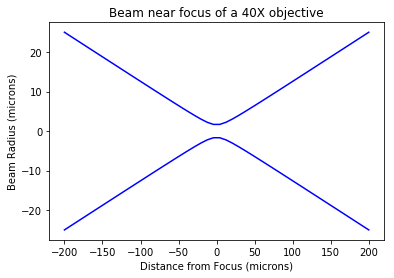

In [4]:
M = 40
lambda0 = 632.8e-9
dbeam = 1e-3
f = obj_focal_length(M)

z = np.linspace(-200,200,50)*1e-6

r = beam_radius(lambda0, dbeam,f, z)
    
plt.plot(z*1e6, r*1e6, color="blue")
plt.plot(z*1e6,-r*1e6, color="blue")

plt.xlabel("Distance from Focus (microns)")
plt.ylabel("Beam Radius (microns)")
plt.title("Beam near focus of a 40X objective")
plt.show()

## 2. Speckle

Lasers have speckle, created by spatial interference effects. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Laser_speckle.jpg/600px-Laser_speckle.jpg" width="30%">

This speckle cannot really be removed, but it has the peculiar property of always being in focus (try it, remove your glasses and observe the speckle).
A near-sighted viewer will see the speckle pattern closer than the actual surface and the speckle will appear to move in a different direction than that of a far-sighted person. See [on-line explanation.](http://isaac.exploratorium.edu/~pauld/summer_institute/summer_day1perception/laserspeckleperception.htm)

## Gaussian Profile

Third, somewhat like the tungsten lamp, the beam will often be brightest in the center and less bright towards the edges.  The typical lowest mode (TEM$_{00}$) pattern has a Gaussian shape that is characterized by its irradiance (power/area) $E(r)$
$$
E(r)= {2 P_0\over \pi r_0^2} \exp\left[-2 {r^2\over r_0^2}\right]
$$ 
where $r$ is measured perpendicular to the optical axis, $P_0$ is the total power of the beam, and $r_0$ is the radial distance at which the irradiance drops to $1/e^2$ of its peak power. 
$$
P_0 = \int_0^{2\pi} \int_0^\infty E(r)\, r dr\,d\phi= 2\pi \int_0^\infty E(r)\, r dr
 = {4 P_0\over r_0^2}\int_0^\infty \exp\left[-2 {r^2\over r_0^2}\right]\, r dr = P_0
$$

Higher order modes (in the laser cavity) lead to more complicated spatial distributions that are usually undesirable.

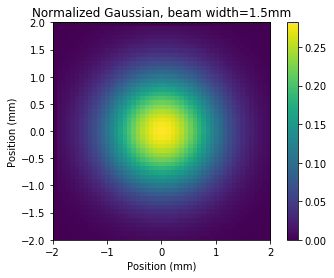

In [5]:
N=50
r0 = 1.5

x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))

for i in range(1, N):
  for j in range(1, N,):
        z[i,j] = 2/np.pi/r0/r0*np.exp(-2*(x[i]**2+y[j]**2)/r0**2)
    
plt.imshow(z, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)))
plt.xlabel("Position (mm)")
plt.ylabel("Position (mm)")
plt.title("Normalized Gaussian, beam width=1.5mm")
plt.colorbar()
plt.show()

If we just do a horizontal slice through the center, then we get the usual Gaussian profile

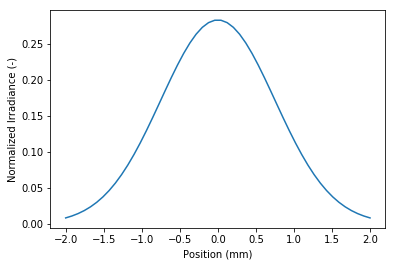

In [6]:
r0 = 1.5

x = np.linspace(-2,2,50)
z = (2/(np.pi*r0**2))*np.exp(-2*x**2/r0**2)

plt.plot(x,z)
plt.xlabel("Position (mm)")
plt.ylabel("Normalized Irradiance (-)")
plt.show()

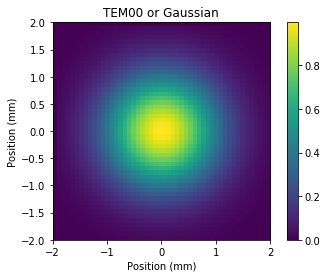

In [7]:
N=50
r0 = 1.5

x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))

for i in range(1, N):
  for j in range(1, N,):
        z[i,j] = tem_mode(0,0,x[i],y[j],r0)
    
plt.imshow(z, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)))
plt.xlabel("Position (mm)")
plt.ylabel("Position (mm)")
plt.title("TEM00 or Gaussian")

plt.colorbar()
plt.show()

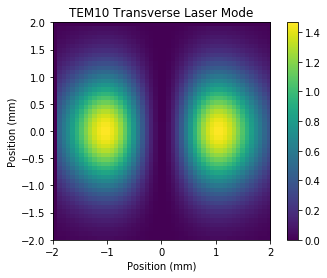

In [8]:
N=50
r0 = 1.5

x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))

for i in range(1, N):
  for j in range(1, N,):
        z[i,j] = tem_mode(1,0,x[i],y[j],r0)
    
plt.imshow(z, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)))
plt.xlabel("Position (mm)")
plt.ylabel("Position (mm)")
plt.title("TEM10 Transverse Laser Mode")

plt.colorbar()
plt.show()

## Other stuff

Finally, in any real experiment there will be spatial beam variations caused by dust or irregularities in the surfaces of the optics.  

# Spatial Filter

<img src="http://omlc.org/~prahl/host/450/week3/spatialfilter.png">

A spatial filter is used to remove unwanted variations across the beam (except for speckle).  The general idea is that the ideal beam from the HeNe will be focused to a small spot at one focal length from the lens.  The light arising from other irregularities will not be focused to the same spot.  Consequently if a pinhole is located at exactly the beam waist, then undesirable variations will be filtered out.

Now obviously, we want the pinhole to be as small as possible.  However, we do not want it to be smaller than focused beam diameter $d_\mathrm{waist}$. A reasonable estimate for the pinhole diameter $d_\mathrm{pinhole}$ is given by <https://www.newport.com/n/spatial-filters> or
$$
d_\mathrm{pinhole} = 2\lambda {f\over d_\mathrm{beam}} = 1.57 d_\mathrm{waist} 
$$
or a little more than half-again the diffraction-limited spot diameter of a focused laser beam.

This means that we can find the pinhole diameter using the magnification of the objective.
$$
d_\mathrm{pinhole}={2\lambda\over M} {\ell_\mathrm{tube}\over d_\mathrm{beam}} 
$$

In [9]:
P=20
pind=pinhole_diameter(632e-9, 1e-3, 20)*1e6
print('The pinhole diameter for a %.0f X objective is %.1f microns'%(P,pind))

The pinhole diameter for a 20 X objective is 10.1 microns


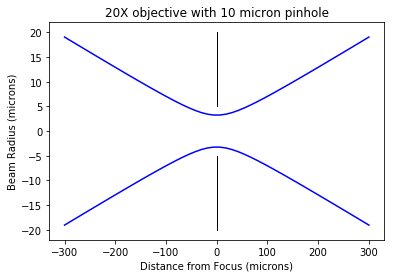

In [10]:
M = 20
lam = 633e-9
dbeam = 1e-3
f = 160e-3/M
N = 50

z = np.linspace(-300,300,N)
rpin = pinhole_diameter(lam,dbeam,M)*1e6/2

r = beam_radius(lam,dbeam,f, z*1e-6)*1e6
    
plt.plot(z,r, color="blue")
plt.plot(z,-r, color="blue")
plt.plot([0, 0], [rpin, 20], color='black', linewidth=1)
plt.plot([0, 0], [-rpin, -20], color='black', linewidth=1)

plt.xlabel("Distance from Focus (microns)")
plt.ylabel("Beam Radius (microns)")
plt.title("20X objective with 10 micron pinhole")

plt.show()

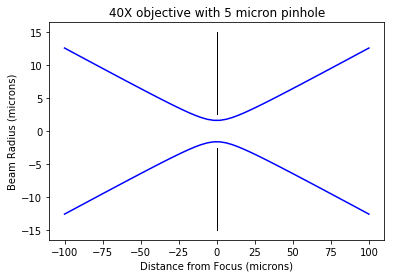

In [11]:
M = 40
lam = 633e-9
dbeam = 1e-3
f = 160e-3/M

z = np.linspace(-100,100,50)
rpin = pinhole_diameter(lam,dbeam,M)*1e6/2

r = beam_radius(lam,dbeam,f, z*1e-6)*1e6
    
plt.plot(z,r, color="blue")
plt.plot(z,-r, color="blue")
plt.plot([0, 0], [rpin, 15], color='black', linewidth=1)
plt.plot([0, 0], [-rpin, -15], color='black', linewidth=1)

plt.xlabel("Distance from Focus (microns)")
plt.ylabel("Beam Radius (microns)")
plt.title("40X objective with 5 micron pinhole")
plt.show()

## Young's Double Slit Experiment

Plane parallel light creates an interference pattern after passing through two slits. For now, ignore the finite size of the slits

<img src="https://omlc.org/~prahl/host/450/week3/diffraction-pattern.png">


If $d$ is the center-to-center slit separation, $L$ the distance to the screen, and $\theta_m$ is the angle then the $m$th maxima will occur when the distance the light travels from each slit is a whole number of wavelengths,
$$
m\lambda = d \sin\theta_m
$$
The first maximum (after the trivial one at $\theta=0^\circ$) is located at
$$
\sin\theta_1 = {\lambda\over d}
$$
and with a bit of algebra the location of the $m$th maximum is
$$
y_m = {\lambda L\over d}m
$$

The normalized intensity pattern is 
$$
I(y) = \cos^2\left( {\pi d\over \lambda L}y \right)
$$

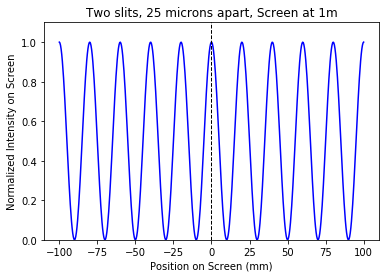

In [12]:

d= 25 * 1e-6
lambda0 = 0.5 * 1e-6
L = 1000 * 1e-3

N= 500
y = np.linspace(-100,100,N)

I = two_slit(d,lambda0,L,y*1e-3)
    
plt.plot(y,I, color="blue")
#plt.plot([0, 0], [rpin, 15], color='black', linewidth=1)
#plt.plot([0, 0], [-rpin, -15], color='black', linewidth=1)

plt.xlabel("Position on Screen (mm)")
plt.ylabel("Normalized Intensity on Screen")
plt.title("Two slits, 25 microns apart, Screen at 1m")
plt.ylim([0,1.1])
plt.plot([0, 0], [0, 1.1], '--', color='black', linewidth=1)

plt.show()

## Two Slits with Finite width

Here the equations have the same $\cos^2\theta$ structure underneath, but now modulated by the Fraunhofer diffraction from a single slit $\sinc^2\beta$
$$
I(y) = {\sin^2\beta\over\beta^2} \cos^2 \alpha = \mathrm{sinc}^2\beta \cos^2 \alpha
$$
where
$$
\alpha = {\pi a\over \lambda}\sin\theta
\qquad\mbox{and}\qquad
\alpha = {\pi d\over \lambda}\sin\theta
\qquad\mbox{and}\qquad
\theta = \tan^{-1}\left({y\over L}\right)
$$


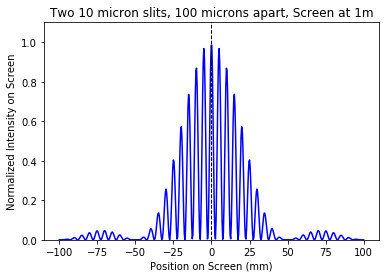

In [13]:

a= 10 * 1e-6
d= 100 * 1e-6
lambda0 = 0.5 * 1e-6
L = 1000 * 1e-3

N= 500
y = np.linspace(-100,100,N)
I = two_width_slit(a,d,lambda0,L,y*1e-3)
    
plt.plot(y,I, color="blue")
#plt.plot([0, 0], [rpin, 15], color='black', linewidth=1)
#plt.plot([0, 0], [-rpin, -15], color='black', linewidth=1)

plt.xlabel("Position on Screen (mm)")
plt.ylabel("Normalized Intensity on Screen")
plt.title("Two 10 micron slits, 100 microns apart, Screen at 1m")
plt.ylim([0,1.1])
plt.plot([0, 0], [0, 1.1], '--', color='black', linewidth=1)

plt.show()

# Pre-lab Questions

### Problem 1
The the focal length
of our objectives is related to the magnification $m$ by $m=f_\mathrm{tube}/f$ where $f_\mathrm{tube}=160$mm.  What is the focal length of a $21\times$ objective?

In [14]:
M = 21
# YOUR CODE HERE
raise NotImplementedError()

f = 7.6mm


### Problem 2
What should the pinhole diameter be if a 20$\times$ objective is used and the HeNe beam is 1mm in diameter?

In [15]:
dbeam = 1e-3
lambda0 = 632.8e-9
M = 20
# YOUR CODE HERE
raise NotImplementedError()

d = 10 microns


### Problem 3
Calculate the focused beam diameter of a 1mm beam after passing through the 20$\times$ objective. 

In [16]:
dbeam = 1e-3
lambda0 = 632.8e-9
M = 20
# YOUR CODE HERE
raise NotImplementedError()

d = 6 microns


### Problem 4

Draw, to scale, a side view of the 10micron pinhole aligned with the focal point of the objective above. Make the pinhole 10 microns thick.  The light will enter as a cone with a 1mm base and 8mm height --- but you will only include
the very tip of the cone in your picture.

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 5
Based on the picture above explain why small changes (say 2 microns) in pinhole position affect light output much more when the pinhole is close to alignment than when far the pinhole is far from being correctly positioned.

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 6
If the laser power is $P_0$, what are the expected powers after the laser beam passes through the 20$\times$ objective and then through the collimating lens (ignore the pinhole)
Assume normal incidence.

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

0.92 $P_0$ and 0.85 $P_0$

### Problem 7 (550 students)

Repeat, the above problem, but include a 10 micron pinhole.  

Now the a Gaussian beam with a total power $P_0$ has an irradiance (power/area) at a radius $r$ of
$$
E(r) = {8P_0\over\pi d_\mathrm{waist}^2} \exp\left[-2\left({ r\over d_\mathrm{waist}/2}\right)^2\right]
= {8P_0\over\pi d_\mathrm{waist}^2} \exp\left[-8\left({ r\over d_\mathrm{waist}}\right)^2\right]
$$

The total power that passes through the pinhole is obtained by integrating a beam with diameter $D_\mathrm{focus}$ over the pinhole 
diameter $D_\mathrm{pinhole}$
$$
P_\mathrm{passed} = P_0 -P_0\exp\left[-2\left({ d_\mathrm{pinhole}\over d_\mathrm{waist}}\right)^2\right]
$$

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 8
If your screen is 200mm wide and located 1000mm from the slits, what slit width $a$ and spacing $d$ will allow you to observe the first minima and 5 maxima as shown in the figure?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

Answer: 6.4 and 32microns

# Experiment

## Spatial Filter Alignment

<img src="https://www.newport.com/mam/celum/celum_assets/OP-900_2_Objective_Lens-S_600w.jpg" width="40%">


Steps:
1. Ensure that the laser beam is aligned with a row of holes on the table and at a constant height
2. Screw the bottom plate of the spatial filter assembly to the table (with short screws)
3. Slip the body of the spatial filter (without objective, but with the black plastic spatial filter plug) onto the bottom plate.
4. Manually move the laser up and down on its post to make sure the beam should passes though the small hole in the plug.  Do not use the vertical tilt on the laser to make this happen (because you'll destroy the horizontal alignment.)  
5. Tighten the screws holding the body to the base.
6. Remove the plug and screw in the objective (see picture above for proper orientation)
7. Do not add the pinhole yet
8. Adjust the transverse position of the spatial filter assembly so that the expanded beam remains centered on the row of holes.  (The center should also remain at a constant height.  If not, manually move the laser so that this is the case.)
10.  Make sure everything is secured.
11. Measure the power from the laser and the power transmitted through the objective.  

Alignment of the pinhole can be challenging because the small pinhole must be centered on all three spatial positions $x$, $y$, and $z$.  

10. Add the magnetic pinhole.  See picture above for details.  Do not touch the pinhole with your fingers or with the objective.
11. Adjust the axial position so that the pinhole is 4mm from the lens surface of the objective.
12. Adjust the $x-y$ pinhole position until a faint light appears on the other side of the pinhole.  
13. Now alternate moving the objective along the $z$-axis with $x-y$ pinhole position corrections until you maximize the transmitted light.  
14. When close to aligned, a small pinhole movement will cause a major change in output then the alignment nearly correct. Small changes that cause small changes in output indicates poor alignment.  
15. Measure the power that makes it through the pinhole.  Continue aligning until you get more than 50% of the light through the pinhole**

## Beam Collimation

Insert a 100mm focal length lens to create a collimated beam of light.  The lens should be at one focal length from the pinhole.  Measure the power after the collimating lens.

## Double Slit Experiment

The double slit slide has six pairs of lines.  You will make measurements using each pair.  

<img src="https://omlc.org/~prahl/host/450/week3/twoslitslide.jpg" width="50%">

Before you leave the lab, make sure you measure each pair of lines ($d$ and $a$) using the metrology microscope.

Illuminate the slits and collect at least two diffraction images using a camera.  Why won't you use a camera lens?

The camera pixels are 3.7 microns square.

# Analysis

Report the measured laser powers and compare with the expected values for the spatial filter.  Why do they differ?

Import the images using the techniques from the "Import images in Jupyter" notebook on Blackboard.

Plot the fringes and determine the locations of the maxima.  Label the maxima with with the fringe order $m$.

550 students.  Use an FFT to determine spatial frequency and the separation between fringes.  Can you estimate the error in the spatial frequency determination?

Use the fringe spacing to deterimine the spacing $d$ between slits.  Compare with the values from the metrology microscope.

Try to estimate the width of the slit $a$. Compare with the values from the metrology microscope.

550 students.  Compare the measured diffraction patterns with those expected.  Include the effects of the individual slit widths and the overall gaussian beam shape.
